#Introduction

Bird strikes, defined as collisions between birds and aircraft, pose significant risks to aviation safety and can result in substantial economic costs due to aircraft damage and flight delays. Between 2000 and 2011, numerous bird strike incidents have been recorded worldwide, leading to increased attention from aviation authorities, researchers, and environmentalists.

This analysis aims to provide a comprehensive overview of bird strikes over this period by utilizing various data visualization techniques. By examining patterns, trends, and key factors associated with bird strikes, we can gain valuable insights into their frequency, distribution, and impact on aviation safety. The visualizations will help identify critical time periods, geographical hotspots, and other relevant factors contributing to bird strikes, ultimately aiding in the development of preventive measures and policies to mitigate such incidents.

**Import Libraries**

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.color_palette()
sns.set_style('darkgrid')

**Import Files**

In [2]:
from google.colab import files
uploaded= files.upload()

Saving Bird Strikes data.xlsx - Bird Strikes.csv to Bird Strikes data.xlsx - Bird Strikes.csv


In [3]:
#Load Data
df = pd.read_csv('Bird Strikes data.xlsx - Bird Strikes.csv')
(df.head())


,Record ID,Aircraft: Type,Airport: Name,Altitude bin,Aircraft: Make/Model,Wildlife: Number struck,Wildlife: Number Struck Actual,Effect: Impact to flight,FlightDate,Effect: Indicated Damage,...,Remains of wildlife sent to Smithsonian,Remarks,Wildlife: Size,Conditions: Sky,Wildlife: Species,Pilot warned of birds or wildlife?,Cost: Total $,Feet above ground,Number of people injured,Is Aircraft Large?
0,202152,Airplane,LAGUARDIA NY,> 1000 ft,B-737-400,Over 100,859,Engine Shut Down,11/23/00 0:00,Caused damage,...,False,FLT 753. PILOT REPTD A HUNDRED BIRDS ON UNKN T...,Medium,No Cloud,Unknown bird - medium,N,"30,736","1,500",0,Yes
1,208159,Airplane,DALLAS/FORT WORTH INTL ARPT,< 1000 ft,MD-80,Over 100,424,NaN,7/25/01 0:00,Caused damage,...,False,102 CARCASSES FOUND. 1 LDG LIGHT ON NOSE GEAR ...,Small,Some Cloud,Rock pigeon,Y,0,0,0,No
2,207601,Airplane,LAKEFRONT AIRPORT,< 1000 ft,C-500,Over 100,261,NaN,9/14/01 0:00,No damage,...,False,FLEW UNDER A VERY LARGE FLOCK OF BIRDS OVER AP...,Small,No Cloud,European starling,N,0,50,0,No
3,215953,Airplane,SEATTLE-TACOMA INTL,< 1000 ft,B-737-400,Over 100,806,Precautionary Landing,9/5/02 0:00,No damage,...,False,"NOTAM WARNING. 26 BIRDS HIT THE A/C, FORCING A...",Small,Some Cloud,European starling,Y,0,50,0,Yes
4,219878,Airplane,NORFOLK INTL,< 1000 ft,CL-RJ100/200,Over 100,942,NaN,6/23/03 0:00,No damage,...,False,NO DMG REPTD.,Small,No Cloud,European starling,N,0,50,0,No


**Data Cleaning**

In [4]:
missing_values_count = df.isnull().sum()

# Print the count of missing values in each column
print("Missing Values in Each Column:")
print(missing_values_count)

Missing Values in Each Column:
Record ID                                      0
Aircraft: Type                               129
Airport: Name                                129
Altitude bin                                 129
Aircraft: Make/Model                           0
Wildlife: Number struck                      129
Wildlife: Number Struck Actual                 0
Effect: Impact to flight                   23480
FlightDate                                   129
Effect: Indicated Damage                       0
Aircraft: Number of engines?                 267
Aircraft: Airline/Operator                   129
Origin State                                 449
When: Phase of flight                        129
Conditions: Precipitation                  23543
Remains of wildlife collected?                 0
Remains of wildlife sent to Smithsonian        0
Remarks                                     4771
Wildlife: Size                               129
Conditions: Sky                       

In [5]:
# Fill missing values in the 'Aircraft: Type' column with the most frequent value
most_frequent_aircraft_type = df['Aircraft: Type'].mode()[0]
df['Aircraft: Type'].fillna(most_frequent_aircraft_type, inplace=True)

# Verify that missing values have been filled
print("Number of missing values in 'Aircraft: Type' after filling:", df['Aircraft: Type'].isnull().sum())

Number of missing values in 'Aircraft: Type' after filling: 0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25558 entries, 0 to 25557
Data columns (total 26 columns):
 #   Column                                   Non-Null Count  Dtype 
---  ------                                   --------------  ----- 
 0   Record ID                                25558 non-null  int64 
 1   Aircraft: Type                           25558 non-null  object
 2   Airport: Name                            25429 non-null  object
 3   Altitude bin                             25429 non-null  object
 4   Aircraft: Make/Model                     25558 non-null  object
 5   Wildlife: Number struck                  25429 non-null  object
 6   Wildlife: Number Struck Actual           25558 non-null  int64 
 7   Effect: Impact to flight                 2078 non-null   object
 8   FlightDate                               25429 non-null  object
 9   Effect: Indicated Damage                 25558 non-null  object
 10  Aircraft: Number of engines?             25291 non-null  o

In [7]:
df.describe()

,Record ID,Wildlife: Number Struck Actual,Number of people injured
count,25558.000000,25558.000000,25558.000000
mean,253916.085609,2.691525,0.001056
std,38510.453382,12.793975,0.050420
min,1195.000000,1.000000,0.000000
25%,225783.750000,1.000000,0.000000
50%,248749.000000,1.000000,0.000000
75%,269168.750000,1.000000,0.000000
max,321909.000000,942.000000,6.000000


In [8]:
# Ensure the 'FlightDate' column is in datetime format
df['FlightDate'] = pd.to_datetime(df['FlightDate'])

# Create a new column for the year and month
df['Year'] = df['FlightDate'].dt.year
df['Month'] = df['FlightDate'].dt.month
print(df.head())

<ipython-input-8-1de7815a3f5c>:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['FlightDate'] = pd.to_datetime(df['FlightDate'])


   Record ID Aircraft: Type                Airport: Name Altitude bin  \
0     202152       Airplane                 LAGUARDIA NY    > 1000 ft   
1     208159       Airplane  DALLAS/FORT WORTH INTL ARPT    < 1000 ft   
2     207601       Airplane            LAKEFRONT AIRPORT    < 1000 ft   
3     215953       Airplane          SEATTLE-TACOMA INTL    < 1000 ft   
4     219878       Airplane                 NORFOLK INTL    < 1000 ft   

  Aircraft: Make/Model Wildlife: Number struck  \
0            B-737-400                Over 100   
1                MD-80                Over 100   
2                C-500                Over 100   
3            B-737-400                Over 100   
4         CL-RJ100/200                Over 100   

   Wildlife: Number Struck Actual Effect: Impact to flight FlightDate  \
0                             859         Engine Shut Down 2000-11-23   
1                             424                      NaN 2001-07-25   
2                             261        

<Axes: >

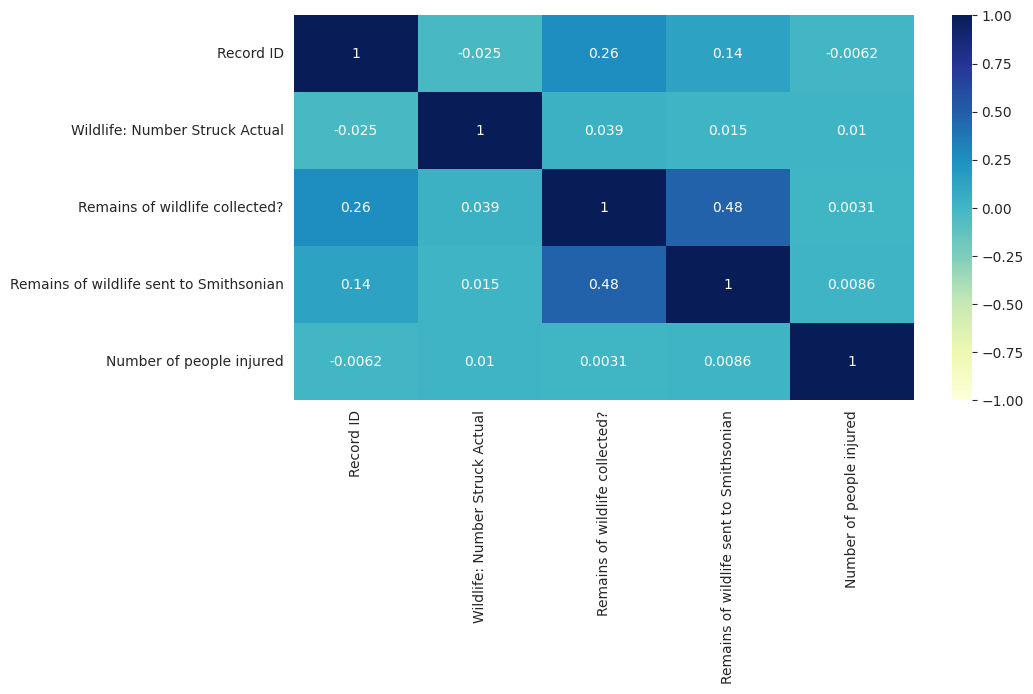

In [20]:
# Creating DataFrame only with neccessary values
bird_strikes = df[['Record ID','Wildlife: Number Struck Actual', 'Remains of wildlife collected?', "Remains of wildlife sent to Smithsonian", "Number of people injured"]]
# Checking the correlation
plt.figure(figsize=(10,5))
sns.heatmap(bird_strikes.corr(method='pearson'), annot=True, vmin=-1, vmax=1, cmap='YlGnBu')


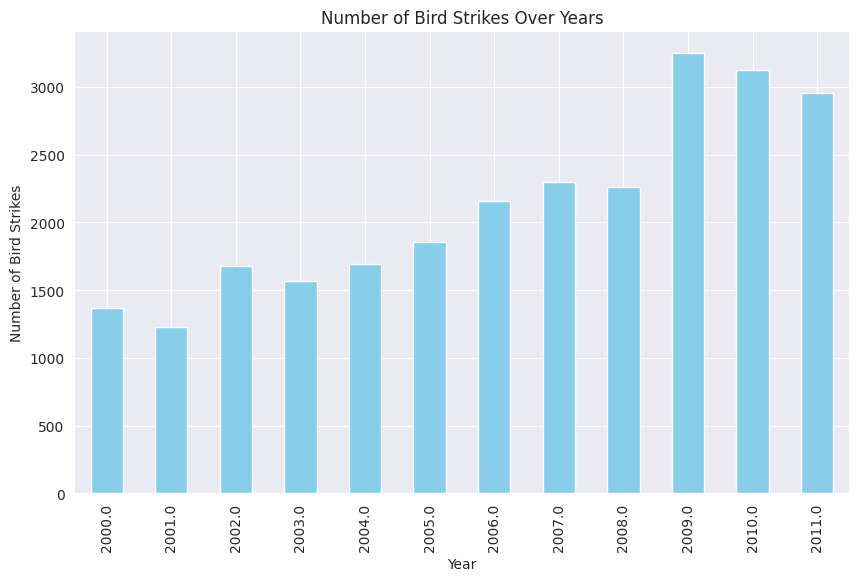

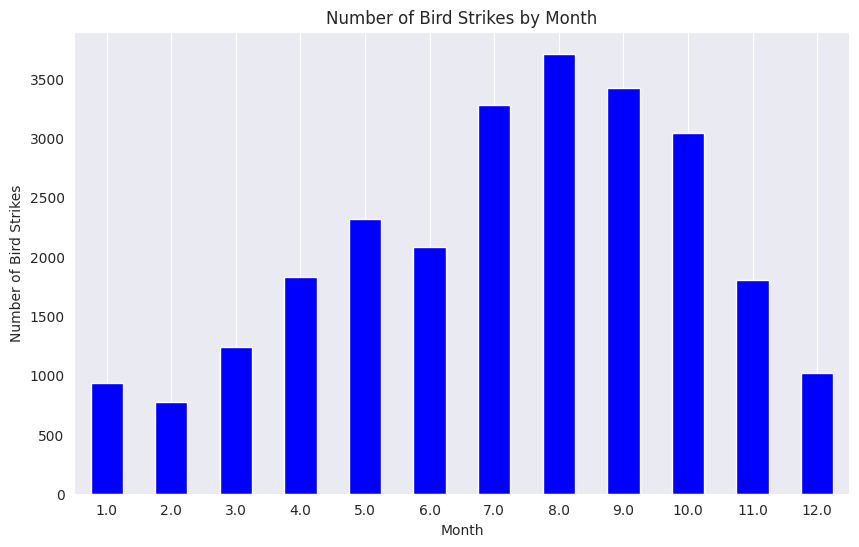

In [9]:
# Bar Plot of Bird Strikes Over Years
plt.figure(figsize=(10, 6))
df.groupby('Year').size().plot(kind='bar', color='skyblue')
plt.title('Number of Bird Strikes Over Years')
plt.xlabel('Year')
plt.ylabel('Number of Bird Strikes')
plt.grid(True)
plt.show()

# Bar Plot of Bird Strikes by Month
plt.figure(figsize=(10, 6))
df.groupby('Month').size().plot(kind='bar', color='blue')
plt.title('Number of Bird Strikes by Month')
plt.xlabel('Month')
plt.ylabel('Number of Bird Strikes')
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.show()

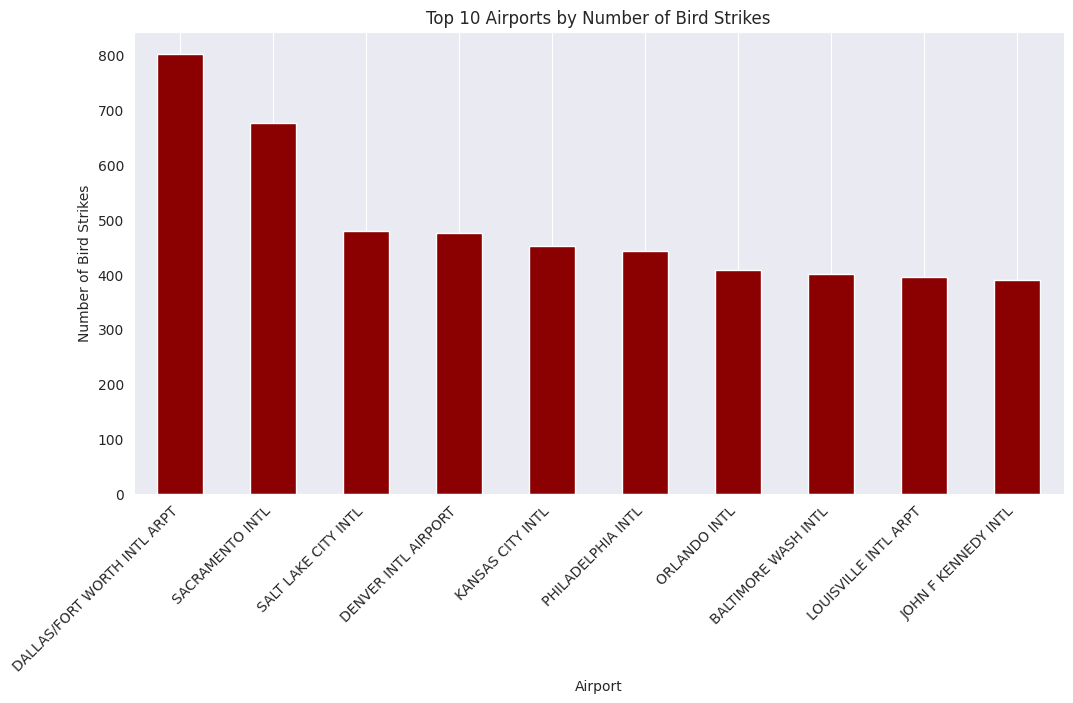

In [10]:
# Bar Plot of airports with the most incidents of bird strikes
top_airports = df['Airport: Name'].value_counts().head(10)
plt.figure(figsize=(12, 6))
top_airports.plot(kind='bar', color='darkred')
plt.title('Top 10 Airports by Number of Bird Strikes')
plt.xlabel('Airport')
plt.ylabel('Number of Bird Strikes')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y')
plt.show()

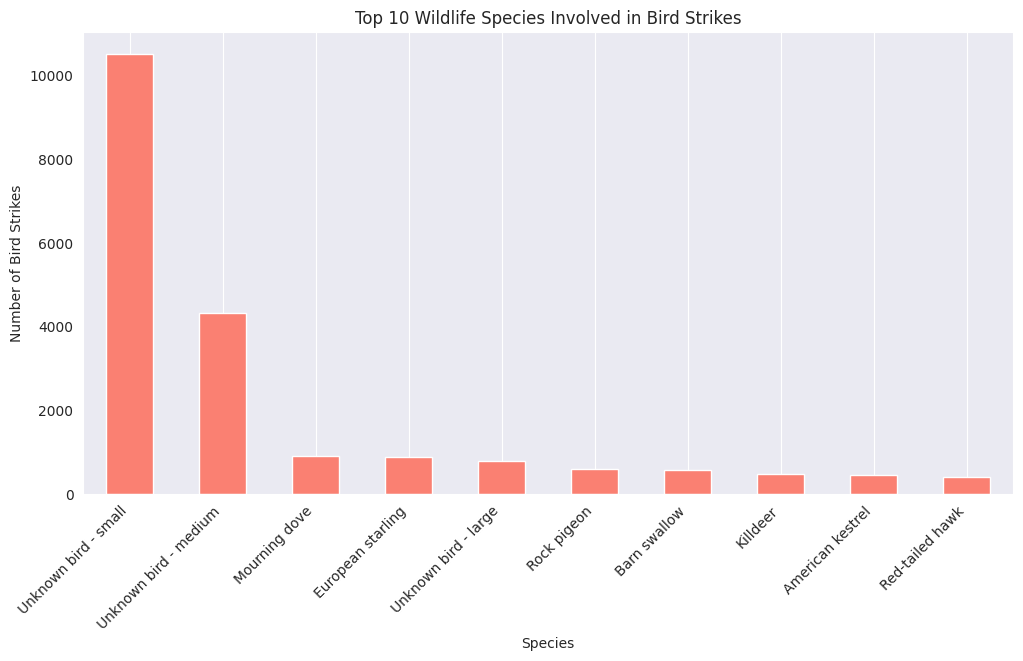

In [11]:
#Bar Plot of Wildlife Species Involved in Bird Strikes
top_species = df['Wildlife: Species'].value_counts().head(10)
plt.figure(figsize=(12, 6))
top_species.plot(kind='bar', color='salmon')
plt.title('Top 10 Wildlife Species Involved in Bird Strikes')
plt.xlabel('Species')
plt.ylabel('Number of Bird Strikes')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y')
plt.show()

**Bird Strike analysis for US**

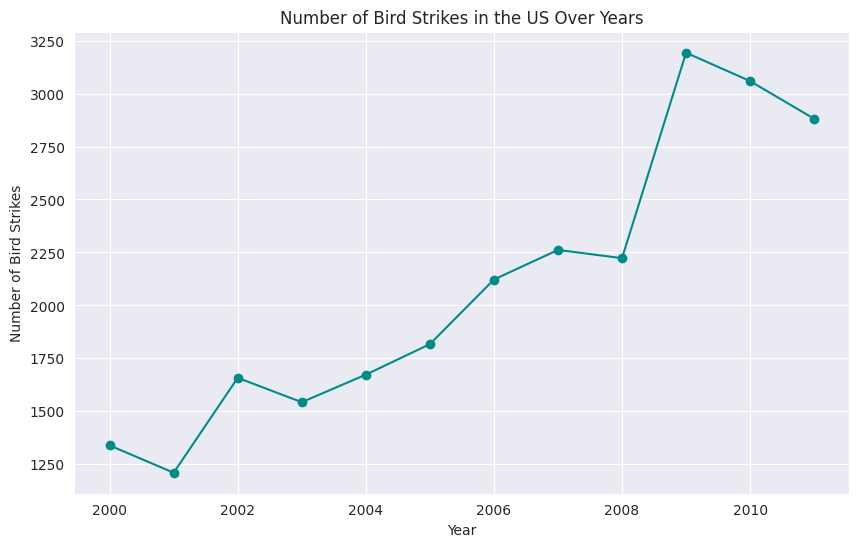

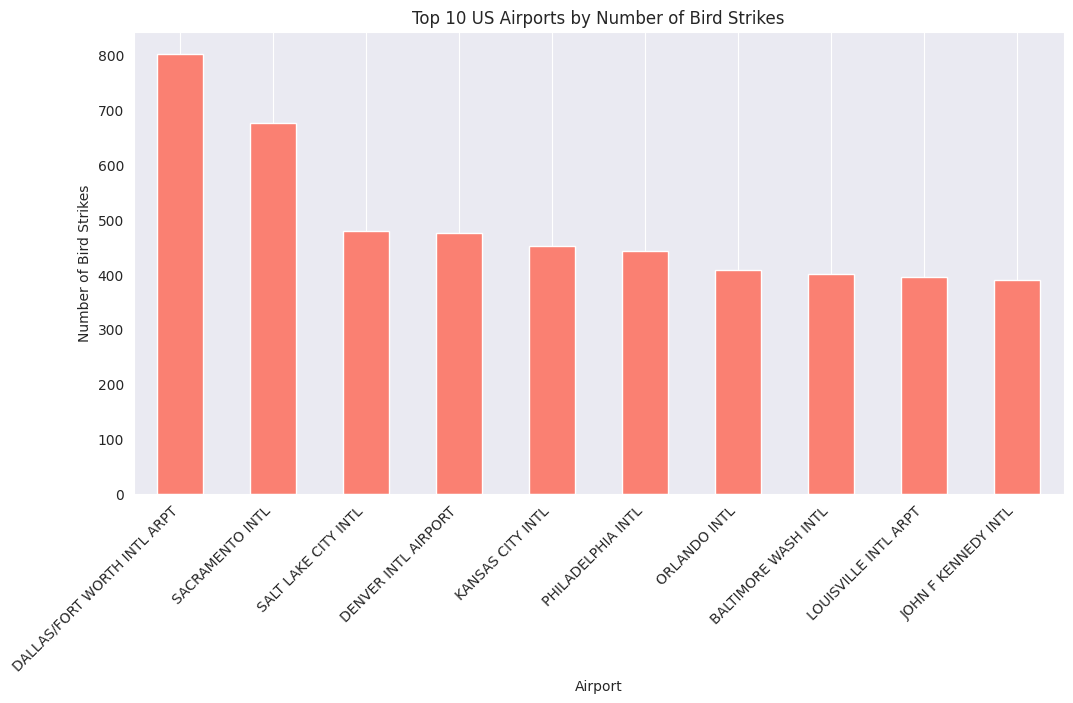

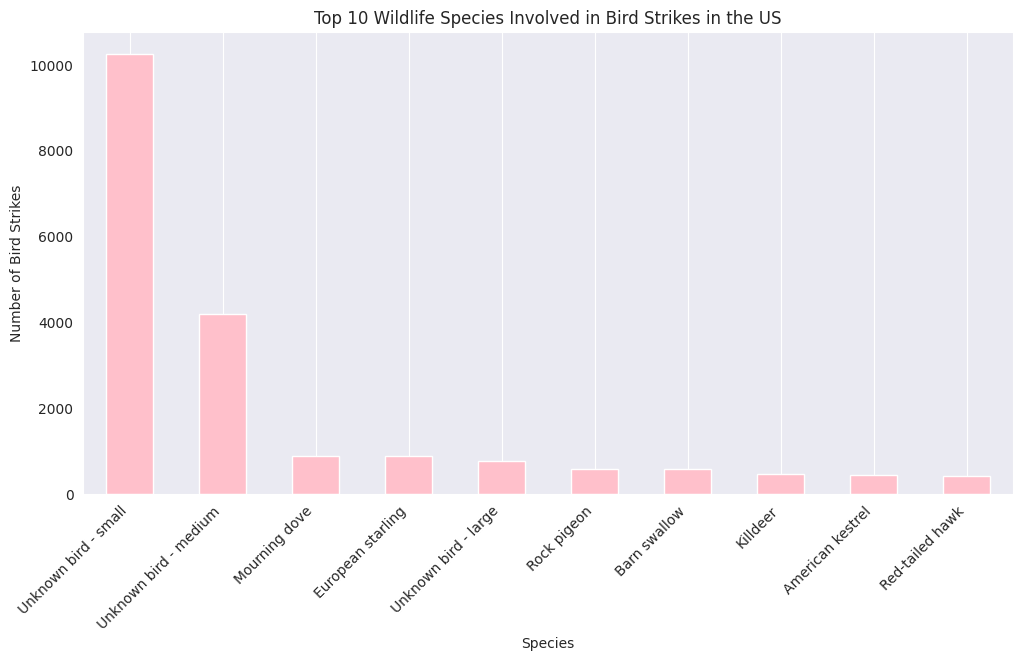

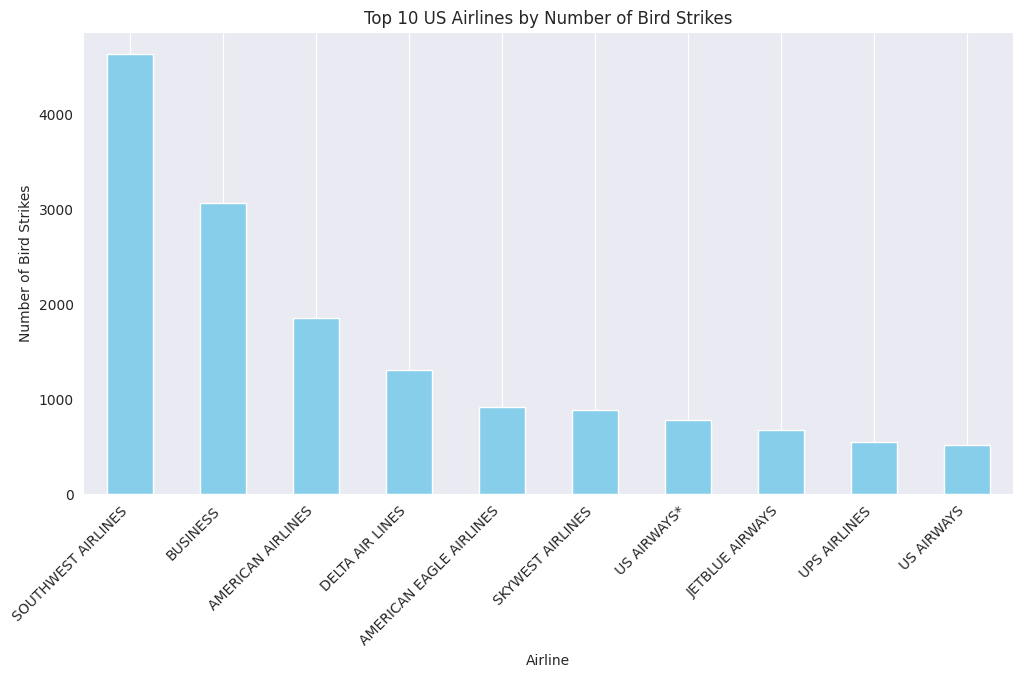

In [12]:
# Bird Strikes in the US Over Years
us_data = df[df['Origin State'].notnull() & (df['Origin State'] != '')]  # Assume that 'Origin State' is the indicator for US
plt.figure(figsize=(10, 6))
us_data.groupby('Year').size().plot(kind='line', marker='o', color='darkcyan')
plt.title('Number of Bird Strikes in the US Over Years')
plt.xlabel('Year')
plt.ylabel('Number of Bird Strikes')
plt.grid(True)
plt.show()

# Bar Plot of Bird Strikes by Airport (US)
top_us_airports = us_data['Airport: Name'].value_counts().head(10)
plt.figure(figsize=(12, 6))
top_us_airports.plot(kind='bar', color='salmon')
plt.title('Top 10 US Airports by Number of Bird Strikes')
plt.xlabel('Airport')
plt.ylabel('Number of Bird Strikes')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y')
plt.show()

# Bar Plot of Bird Strikes by Wildlife Species (US)
top_us_species = us_data['Wildlife: Species'].value_counts().head(10)
plt.figure(figsize=(12, 6))
top_us_species.plot(kind='bar', color='pink')
plt.title('Top 10 Wildlife Species Involved in Bird Strikes in the US')
plt.xlabel('Species')
plt.ylabel('Number of Bird Strikes')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y')
plt.show()

# Count the number of bird strikes per airline
top_us_airlines = us_data['Aircraft: Airline/Operator'].value_counts().head(10)

# Plot the top 10 US airlines by number of bird strikes
plt.figure(figsize=(12, 6))
top_us_airlines.plot(kind='bar', color='skyblue')
plt.title('Top 10 US Airlines by Number of Bird Strikes')
plt.xlabel('Airline')
plt.ylabel('Number of Bird Strikes')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y')
plt.show()

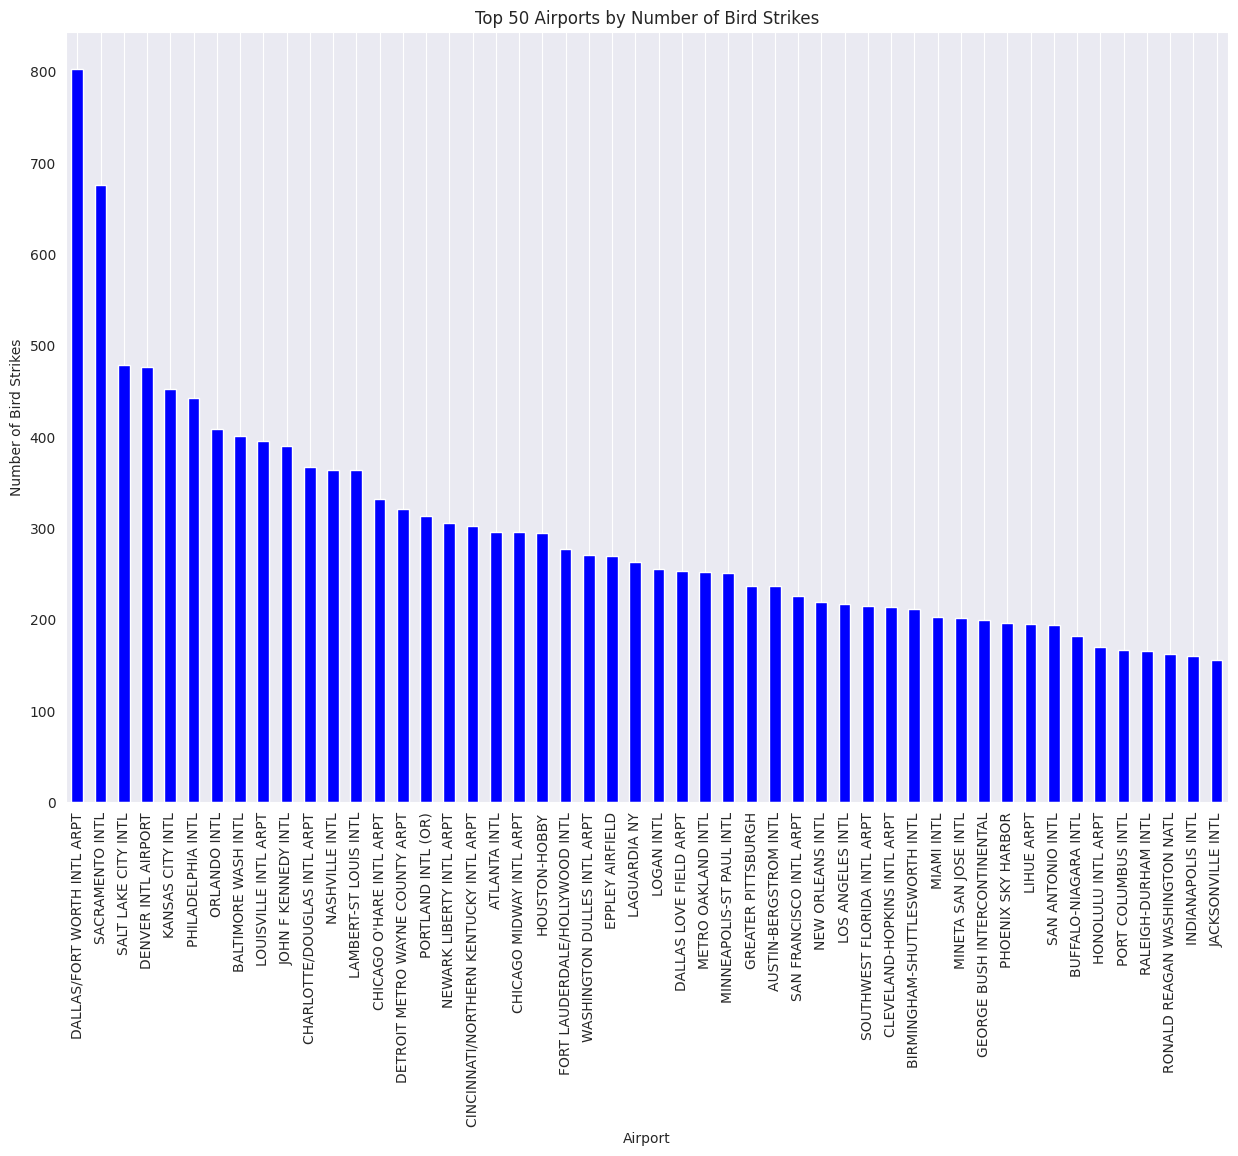

In [13]:
# Count the number of bird strikes per airport
top_airports = df['Airport: Name'].value_counts().head(50)

# airports with the most incidents of bird strikes (Top 50)
plt.figure(figsize=(15, 10))
top_airports.plot(kind='bar', color='blue')
plt.title('Top 50 Airports by Number of Bird Strikes')
plt.xlabel('Airport')
plt.ylabel('Number of Bird Strikes')
plt.xticks(rotation=90)
plt.grid(axis='y')
plt.show()

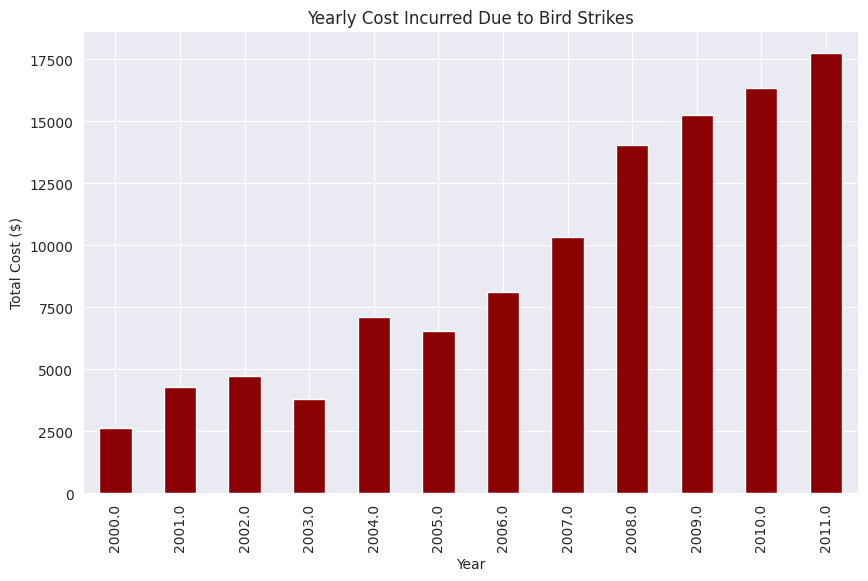

In [14]:
# Extract year from the 'FlightDate' column
df['Year'] = df['FlightDate'].dt.year

# The 'Cost: Total $' column is numeric
df['Cost: Total $'] = pd.to_numeric(df['Cost: Total $'], errors='coerce')

# Group by year and sum the costs
yearly_cost = df.groupby('Year')['Cost: Total $'].sum()

# Bar Plot the yearly cost due to bird strikes
plt.figure(figsize=(10, 6))
yearly_cost.plot(kind='bar', color='darkred')
plt.title('Yearly Cost Incurred Due to Bird Strikes')
plt.xlabel('Year')
plt.ylabel('Total Cost ($)')
plt.grid(True)
plt.show()

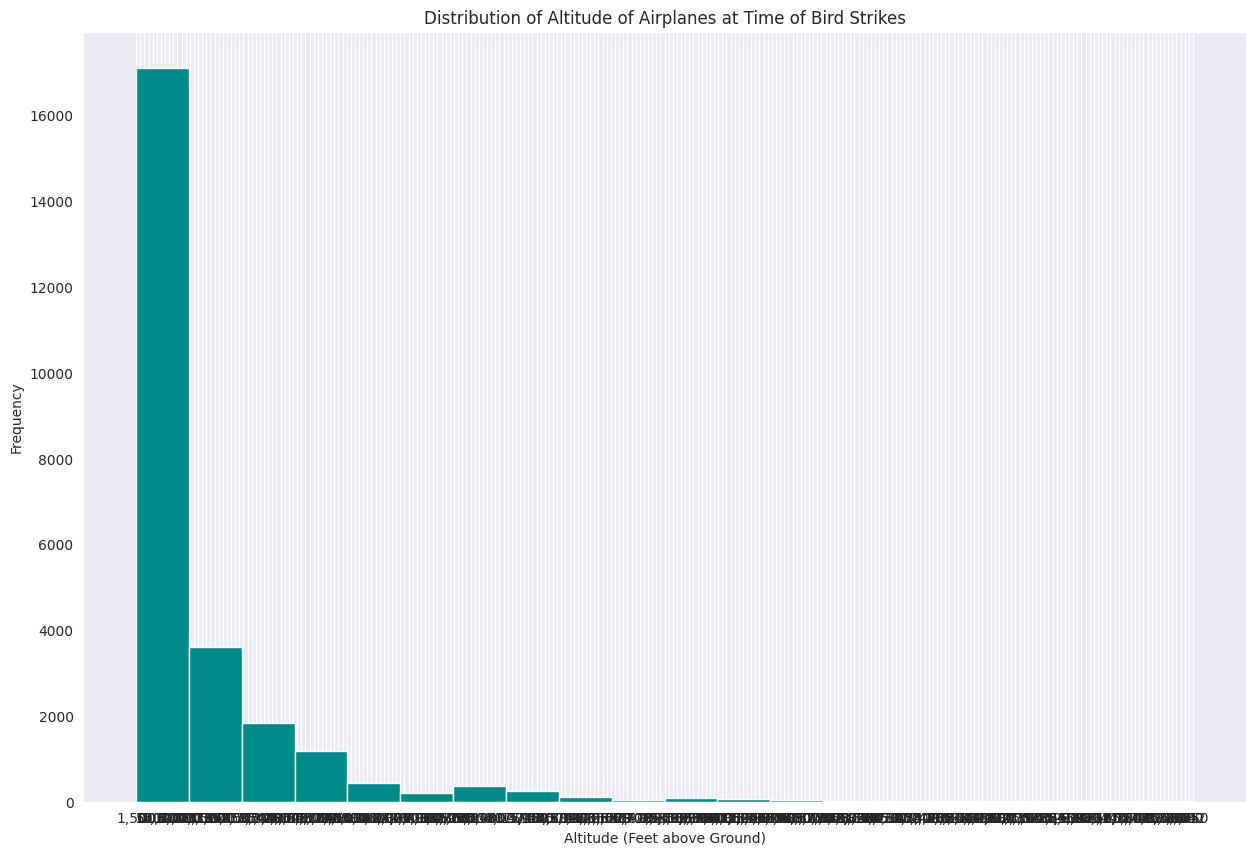

In [15]:
# Filter out rows where altitude information is missing
with_altitude_data = df[df['Feet above ground'].notnull()]

# Plot a histogram of altitudes
plt.figure(figsize=(15, 10))
plt.hist(with_altitude_data['Feet above ground'], bins=20, color='darkcyan')
plt.title('Distribution of Altitude of Airplanes at Time of Bird Strikes')
plt.xlabel('Altitude (Feet above Ground)')
plt.ylabel('Frequency')
plt.grid(axis='y')
plt.show()

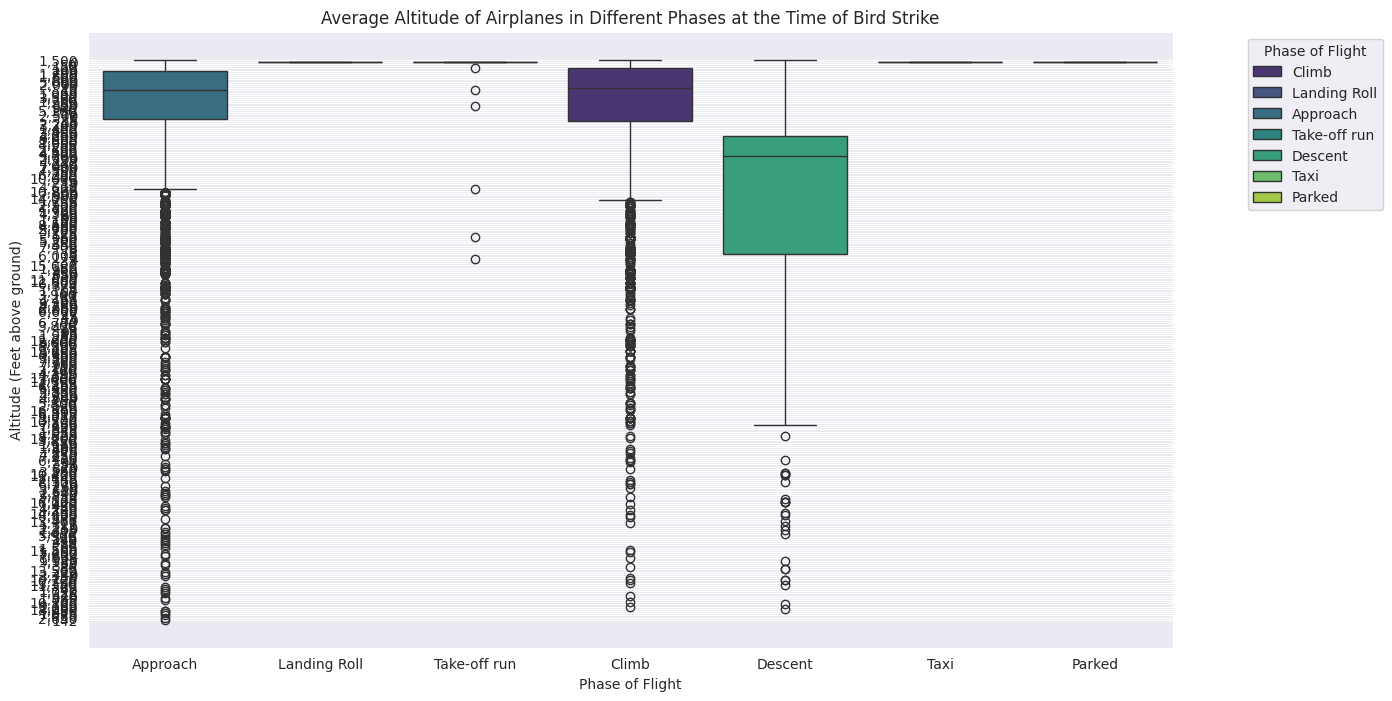

In [16]:
# Count the number of bird strikes for each phase of flight
phase_counts = df['When: Phase of flight'].value_counts()

# Plot the timing of bird strikes during different phases of flight
plt.figure(figsize=(14, 8))
sns.boxplot(x='When: Phase of flight', y='Feet above ground', hue='When: Phase of flight', data=df,
            order=df['When: Phase of flight'].value_counts().index, palette='viridis')
plt.title('Average Altitude of Airplanes in Different Phases at the Time of Bird Strike')
plt.xlabel('Phase of Flight')
plt.ylabel('Altitude (Feet above ground)')
plt.legend(title='Phase of Flight', loc='upper right', bbox_to_anchor=(1.2, 1))
plt.show()

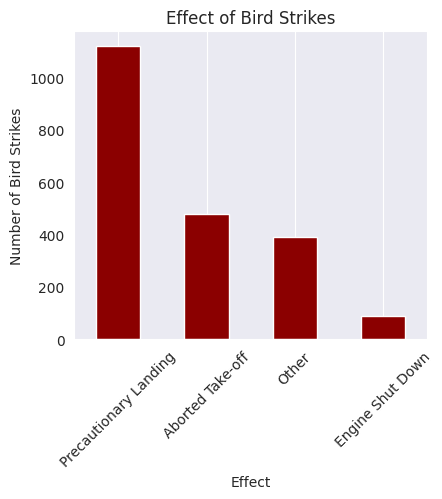

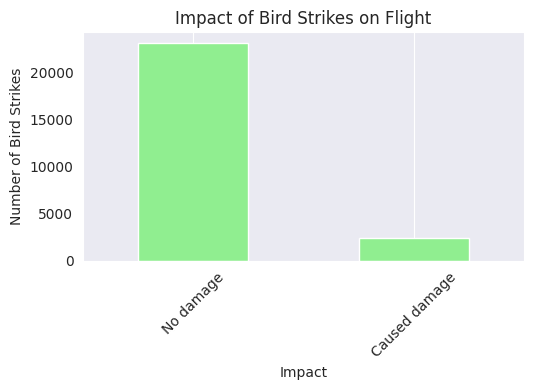

In [17]:
# Count the number of occurrences for each reported impact on flight
impact_counts = df['Effect: Indicated Damage'].value_counts()

# Count the number of occurrences for each effect of bird strikes
effect_counts = df['Effect: Impact to flight'].value_counts()

# Plot the effects of bird strikes
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
effect_counts.plot(kind='bar', color='darkred')
plt.title('Effect of Bird Strikes')
plt.xlabel('Effect')
plt.ylabel('Number of Bird Strikes')
plt.xticks(rotation=45)
plt.grid(axis='y')

# Plot the impacts on flight
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 2)
impact_counts.plot(kind='bar', color='lightgreen')
plt.title('Impact of Bird Strikes on Flight')
plt.xlabel('Impact')
plt.ylabel('Number of Bird Strikes')
plt.xticks(rotation=45)
plt.grid(axis='y')

plt.tight_layout()
plt.show()

<Figure size 1000x500 with 0 Axes>

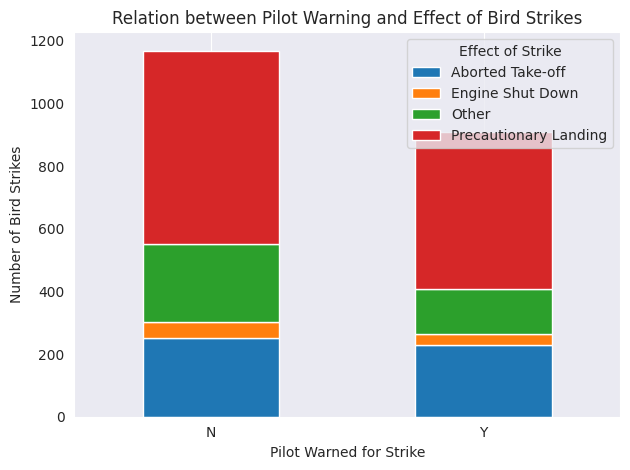

In [18]:
# Filter rows where information about pilot warning and effect of strike is missing
filter_data = df[(df['Pilot warned of birds or wildlife?'].notnull()) & (df['Effect: Impact to flight'].notnull())]

# Count the number of each combination of pilot warning and effect of bird strike
warning_effect_counts = filter_data.groupby(['Pilot warned of birds or wildlife?', 'Effect: Impact to flight']).size().unstack(fill_value=0)

# Plot the distribution of pilot warning and effect of strike
plt.figure(figsize=(10, 5))
warning_effect_counts.plot(kind='bar', stacked=True)
plt.title('Relation between Pilot Warning and Effect of Bird Strikes')
plt.xlabel('Pilot Warned for Strike')
plt.ylabel('Number of Bird Strikes')
plt.xticks(rotation=0)
plt.legend(title='Effect of Strike')
plt.grid(axis='y')
plt.tight_layout()
plt.show()